<a href="https://colab.research.google.com/github/shahchayan9/Apache-Beam-Data-Engineering/blob/main/EDA_d3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np


In [ ]:
# Load the dataset (assuming it's in a CSV format)
df = pd.read_csv('/content/drive/MyDrive/Datasets/world_happiness.csv')


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Option 1: Dropping rows with missing values
df_cleaned = df.dropna()
print("Data after dropping missing values:")
print(df_cleaned.head())

# Option 2: Fill missing values with mean (for numeric columns)
df_filled = df.fillna(df.mean(numeric_only=True))
print("Data after filling missing values:")
print(df_filled.head())

# Verify if 'Country or region' column is fine (removing the split operation)
print("Country or region column:")
print(df['Country or region'].head())

# Ensure proper data types (especially for numeric columns)
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df['GDP per capita'] = pd.to_numeric(df['GDP per capita'], errors='coerce')
df['Social support'] = pd.to_numeric(df['Social support'], errors='coerce')
df['Healthy life expectancy'] = pd.to_numeric(df['Healthy life expectancy'], errors='coerce')
df['Freedom to make life choices'] = pd.to_numeric(df['Freedom to make life choices'], errors='coerce')
df['Generosity'] = pd.to_numeric(df['Generosity'], errors='coerce')
df['Perceptions of corruption'] = pd.to_numeric(df['Perceptions of corruption'], errors='coerce')

# Drop non-numeric columns like 'Country or region' when performing numeric operations
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Get descriptive statistics for numeric columns
print("Descriptive statistics for numeric columns:")
print(numeric_columns.describe())

# Calculate and print the correlation matrix
print("Correlation matrix:")
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

Missing values in each column:
 Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
Data after dropping missing values:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1           

In [ ]:
!pip install --force-reinstall numpy matplotlib


  Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.3 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached pillow-11.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached numpy-2.1.2-cp310-cp310

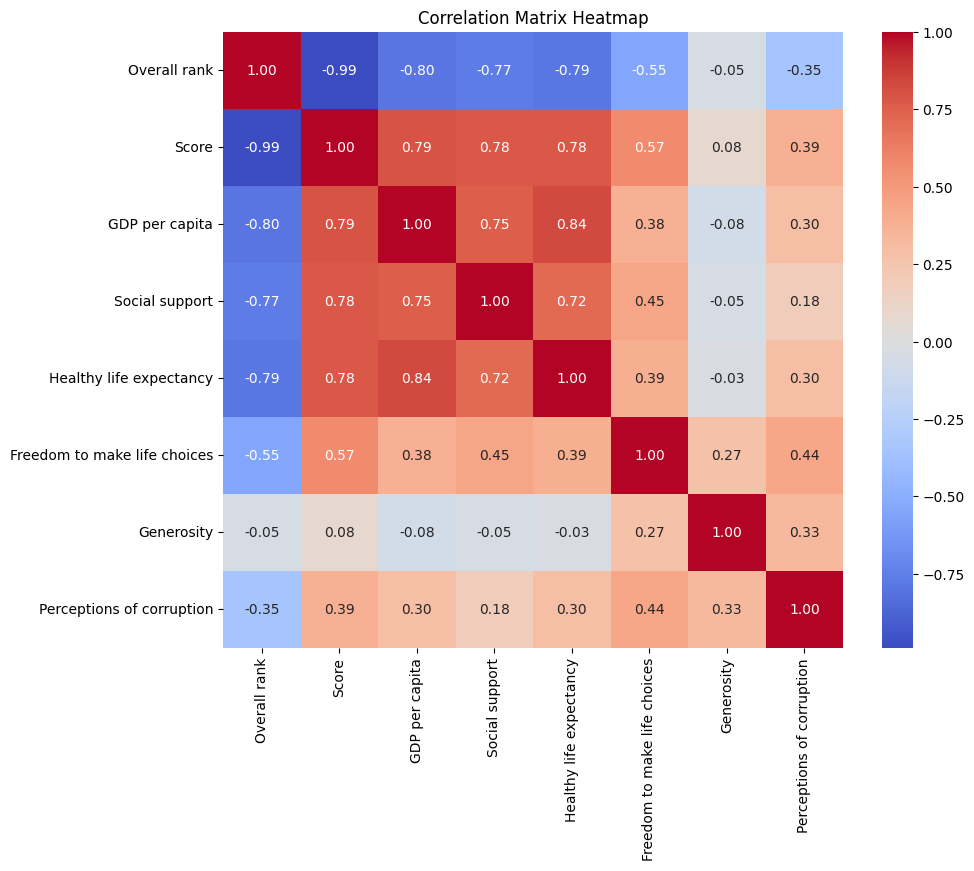

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for correlation
plt.figure(figsize=(10,8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
%%html
<!DOCTYPE html>
<meta charset="utf-8">
<script src="https://d3js.org/d3.v6.min.js"></script>
<div id="chart"></div>
<script>
    // Sample data
    var dataset = [
        {country: "Finland", score: 7.842},
        {country: "Denmark", score: 7.620},
        {country: "Switzerland", score: 7.571},
        {country: "Iceland", score: 7.554},
        {country: "Netherlands", score: 7.464}
    ];

    var svgWidth = 600, svgHeight = 400, barPadding = 5;
    var barWidth = (svgWidth / dataset.length);

    var svg = d3.select('#chart')
        .append('svg')
        .attr("width", svgWidth)
        .attr("height", svgHeight);

    var barChart = svg.selectAll("rect")
        .data(dataset)
        .enter()
        .append("rect")
        .attr("y", function(d) {
            return svgHeight - (d.score * 50);  // Scale scores for visual effect
        })
        .attr("height", function(d) {
            return d.score * 50;  // Scale scores for visual effect
        })
        .attr("width", barWidth - barPadding)
        .attr("transform", function (d, i) {
            var translate = [barWidth * i, 0];
            return "translate("+ translate +")";
        })
        .attr("fill", "teal");

    // Adding text labels
    var text = svg.selectAll("text")
        .data(dataset)
        .enter()
        .append("text")
        .text(function(d) {
            return d.country + ": " + d.score;
        })
        .attr("y", function(d, i) {
            return svgHeight - (d.score * 50) - 10;  // Position labels above bars
        })
        .attr("x", function(d, i) {
            return barWidth * i + 10;
        })
        .attr("fill", "black");
</script>


In [ ]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Bar Chart - Top 10 Countries by Happiness Score</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        .bar {
            fill: steelblue;
        }
        .bar:hover {
            fill: orange;
        }
        .axis-label {
            font-size: 12px;
        }
    </style>
</head>
<body>

<h3>Top 10 Countries by Happiness Score</h3>
<svg width="800" height="400"></svg>

<script>
    // Top 10 countries by happiness score (example dataset, replace with your actual data)
    const data = [
        { country: 'Finland', score: 7.769 },
        { country: 'Denmark', score: 7.600 },
        { country: 'Norway', score: 7.554 },
        { country: 'Iceland', score: 7.494 },
        { country: 'Netherlands', score: 7.488 },
        { country: 'Switzerland', score: 7.480 },
        { country: 'Sweden', score: 7.343 },
        { country: 'New Zealand', score: 7.307 },
        { country: 'Canada', score: 7.278 },
        { country: 'Austria', score: 7.246 }
    ];

    const svg = d3.select("svg"),
          margin = {top: 20, right: 30, bottom: 40, left: 90},
          width = +svg.attr("width") - margin.left - margin.right,
          height = +svg.attr("height") - margin.top - margin.bottom;

    const g = svg.append("g")
                 .attr("transform", `translate(${margin.left},${margin.top})`);

    const x = d3.scaleLinear()
                .domain([0, d3.max(data, d => d.score)])
                .range([0, width]);

    const y = d3.scaleBand()
                .domain(data.map(d => d.country))
                .range([0, height])
                .padding(0.1);

    g.append("g")
     .selectAll(".bar")
     .data(data)
     .enter()
     .append("rect")
     .attr("class", "bar")
     .attr("y", d => y(d.country))
     .attr("width", d => x(d.score))
     .attr("height", y.bandwidth());

    g.append("g")
     .call(d3.axisLeft(y));

    g.append("g")
     .attr("transform", `translate(0,${height})`)
     .call(d3.axisBottom(x));

    // Add labels
    g.selectAll(".label")
     .data(data)
     .enter()
     .append("text")
     .attr("class", "axis-label")
     .attr("y", d => y(d.country) + y.bandwidth() / 2)
     .attr("x", d => x(d.score) + 5)
     .attr("dy", ".35em")
     .text(d => d.score);
</script>

</body>
</html>



In [ ]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Scatter Plot - GDP vs Life Expectancy</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        .dot {
            fill: steelblue;
        }
        .dot:hover {
            fill: orange;
        }
        .axis-label {
            font-size: 12px;
        }
    </style>
</head>
<body>

<h3>Scatter Plot - GDP per Capita vs Life Expectancy</h3>
<svg width="800" height="500"></svg>

<script>
    // Example data for GDP and life expectancy (replace with your actual dataset)
    const data = [
        { country: 'Finland', gdp: 1.340, life_expectancy: 81.6 },
        { country: 'Denmark', gdp: 1.383, life_expectancy: 80.8 },
        { country: 'Norway', gdp: 1.488, life_expectancy: 82.3 },
        { country: 'Iceland', gdp: 1.380, life_expectancy: 82.7 },
        { country: 'Netherlands', gdp: 1.396, life_expectancy: 81.8 },
        { country: 'Switzerland', gdp: 1.452, life_expectancy: 83.6 },
        { country: 'Sweden', gdp: 1.387, life_expectancy: 82.6 },
        { country: 'New Zealand', gdp: 1.303, life_expectancy: 81.4 },
        { country: 'Canada', gdp: 1.325, life_expectancy: 82.1 },
        { country: 'Austria', gdp: 1.376, life_expectancy: 81.4 }
    ];

    const svg = d3.select("svg"),
          margin = {top: 20, right: 30, bottom: 40, left: 60},
          width = +svg.attr("width") - margin.left - margin.right,
          height = +svg.attr("height") - margin.top - margin.bottom;

    const g = svg.append("g")
                 .attr("transform", `translate(${margin.left},${margin.top})`);

    const x = d3.scaleLinear()
                .domain([d3.min(data, d => d.gdp), d3.max(data, d => d.gdp)])
                .range([0, width]);

    const y = d3.scaleLinear()
                .domain([d3.min(data, d => d.life_expectancy), d3.max(data, d => d.life_expectancy)])
                .range([height, 0]);

    g.append("g")
     .attr("transform", `translate(0,${height})`)
     .call(d3.axisBottom(x).tickFormat(d => `$${d}k`));

    g.append("g")
     .call(d3.axisLeft(y));

    g.selectAll(".dot")
     .data(data)
     .enter()
     .append("circle")
     .attr("class", "dot")
     .attr("cx", d => x(d.gdp))
     .attr("cy", d => y(d.life_expectancy))
     .attr("r", 5);

    // Add labels
    g.selectAll(".label")
     .data(data)
     .enter()
     .append("text")
     .attr("class", "axis-label")
     .attr("x", d => x(d.gdp))
     .attr("y", d => y(d.life_expectancy) - 10)
     .text(d => d.country);
</script>

</body>
</html>


In [ ]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Radial Cluster Diagram</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
</head>
<body>

<h3>Radial Cluster Diagram</h3>
<svg width="600" height="600"></svg>

<script>
    const width = 600;
    const height = 600;
    const radius = width / 2;

    const tree = d3.cluster()
                   .size([2 * Math.PI, radius - 100]);

    const root = d3.hierarchy({
        name: "Happiness Factors",
        children: [
            {
                name: "Social Support",
                children: [
                    { name: "Friends" },
                    { name: "Family" }
                ]
            },
            {
                name: "GDP",
                children: [
                    { name: "Income" },
                    { name: "Employment" }
                ]
            },
            { name: "Freedom" }
        ]
    });

    const svg = d3.select("svg")
                  .attr("viewBox", [-width / 2, -height / 2, width, height]);

    const link = svg.append("g")
                    .selectAll("path")
                    .data(tree(root).links())
                    .enter()
                    .append("path")
                    .attr("d", d3.linkRadial()
                        .angle(d => d.x)
                        .radius(d => d.y))
                    .style("fill", "none")
                    .style("stroke", "#ccc");

    const node = svg.append("g")
                    .selectAll("g")
                    .data(root.descendants())
                    .enter()
                    .append("g")
                    .attr("transform", d => `
                        rotate(${d.x * 180 / Math.PI - 90})
                        translate(${d.y},0)
                    `);

    node.append("circle")
        .attr("r", 5)
        .style("fill", "#69b3a2");

    node.append("text")
        .attr("dy", "0.31em")
        .attr("x", d => d.x < Math.PI === !d.children ? 6 : -6)
        .attr("text-anchor", d => d.x < Math.PI === !d.children ? "start" : "end")
        .attr("transform", d => d.x >= Math.PI ? "rotate(180)" : null)
        .text(d => d.data.name);
</script>

</body>
</html>


In [ ]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Tree Map - Happiness Score by Country</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
</head>
<body>

<h3>Tree Map - Happiness Score by Country</h3>
<svg width="800" height="400"></svg>

<script>
    const data = {
        name: "World",
        children: [
            { name: "Finland", value: 7.769 },
            { name: "Denmark", value: 7.600 },
            { name: "Norway", value: 7.554 },
            { name: "Iceland", value: 7.494 }
            // Add more countries here
        ]
    };

    const width = 800;
    const height = 400;

    const svg = d3.select("svg")
                  .attr("width", width)
                  .attr("height", height);

    const root = d3.hierarchy(data)
                   .sum(d => d.value);

    d3.treemap()
      .size([width, height])
      .padding(1)
      (root);

    const color = d3.scaleSequential(d3.interpolateBlues)
                    .domain([6, 8]);

    const node = svg.selectAll("g")
                    .data(root.leaves())
                    .enter()
                    .append("g")
                    .attr("transform", d => `translate(${d.x0},${d.y0})`);

    node.append("rect")
        .attr("width", d => d.x1 - d.x0)
        .attr("height", d => d.y1 - d.y0)
        .style("fill", d => color(d.value));

    node.append("text")
        .attr("x", 3)
        .attr("y", 15)
        .text(d => `${d.data.name}: ${d.value}`);
</script>

</body>
</html>
